# Graphillionによる最適化

この章ではGraphillionの機能を用いて，いくつかの複合的な制約を満たす，最適な経路を求める**最適化問題**を解く方法を紹介します．

## 問題設定

以下の図のようなグラフを考えます．グラフの各辺に数字が付与されていることに注意してください．この数字は辺の**重み**を表現しています．

![重み付きグラフ](img/07/graph.png)

このグラフ上の頂点1からスタートして，頂点2, 6をめぐる最長・最短の巡回路を求めてみましょう．なお，巡回路の長さは通過した辺の重みの和とします．また，ある辺は順回路中で一度しか通過できないものとします．

## 初期化，グラフ集合の作成

まずこれまでと同様に`GraphSet`モジュールをインポートし，`GraphSet.set_universe()`メソッドによって`GraphSet`を初期化します．

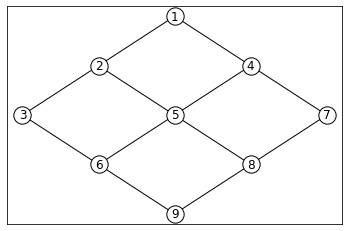

In [10]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_subgraph

GraphSet.set_universe(tutorial.grid(2, 2))
draw_subgraph(GraphSet.universe())

次に`GraphSet`オブジェクトを作成します．求めたいのは巡回路なので，まずは巡回路の集合を表す`GraphSet`を作成します．

In [21]:
cycles = GraphSet.cycles()

こうして作られた`cycles`は，すべての巡回路を含む`GraphSet`オブジェクトです．今回必要なのは頂点1, 2, 6を含む巡回路なので，ここからさらに`gs.including()`メソッドによって絞り込みを行います．

In [22]:
cycles = cycles.including(1).including(2).including(6)
len(cycles)

5

次にここから辺重みの和を最大・最小とする巡回路をそれぞれ求めてみましょう．どちらもイテレータを用いることで簡単に選択することができます．

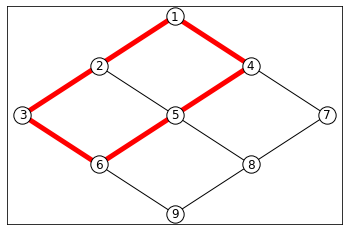

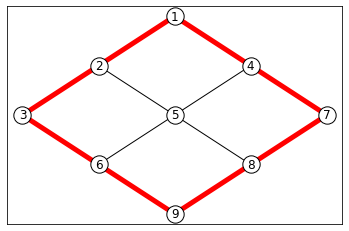

In [28]:
edge_weights = { # 辺重みの設定．
    (1, 2): 4,
    (1, 4): 1,
    (2, 3): 1,    
    (2, 5): 3,
    (3, 6): 5,
    (4, 5): 1,
    (4, 7): 3,
    (5, 6): 1,
    (5, 8): 2,
    (6, 9): 2,
    (7, 8): 3,
    (8, 9): 3
}

min_cycle = next(cycles.min_iter(weights=edge_weights))
max_cycle = next(cycles.max_iter(weights=edge_weights))
draw_subgraph(GraphSet.universe(), min_cycle)
draw_subgraph(GraphSet.universe(), max_cycle)

条件を追加するとさらに複雑な計算を行うこともできます．１, 2, 6は通過するけど，3と7のどちらかしか通らない最長の巡回路を求めてみましょう．こちらも`GraphSet`の演算を組み合わせることで簡単に実現できます．

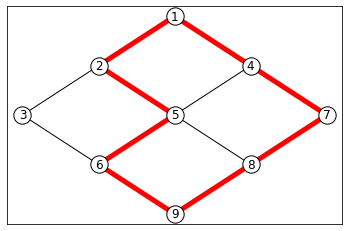

In [34]:
cycles = GraphSet.cycles()
cycles = cycles.including(1).including(2).including(6)
include_37 = cycles.including(3).including(7)
cycles = cycles.difference(include_37)

max_cycle = next(cycles.max_iter(weights=edge_weights))
draw_subgraph(GraphSet.universe(), max_cycle)

Graphillionを用いた最適化法の特徴として，辺の重みを変更して問題を解き直すのが容易という点が挙げられます．既存の最適化問題用のソルバーでは，辺の重みが変化すると最適化問題を再度解き直す必要がありました．一方でGraphillionはグラフの集合 `gs`を再利用して最適化問題を解くことができるので，重みが変わっただけであれば非常に高速に解を求めなおすことができます．この特徴により，Graphillionは重みが変化しつつ繰り返し最適化問題を解かなければならない場面で効果を発揮します．

## この章のまとめ

この章ではGraphillionを用いて最適化問題を解く例を紹介しました．最適化問題を解くことに限定すればGraphillion意外にも有用なツールは多数存在します．一方で，ただ最適化するだけでなく，適宜条件を追加したり，解をいくつも取り出したりといった柔軟さがGraphillionには備わっています．[次章](08_network_reliability.ipynb)ではより複雑な問題をGraphillionを使って解く事例を紹介します．
